In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Jacobi Method

In [2]:
start = time.time()
M = 100
V = 0
a = 0.01 #meters
rho = np.zeros([M+1, M+1], float)
rho[60:81, 20:41] = 1
rho[20:41, 60:81] = -1

phi = np.zeros([M+1, M+1], float)
phiprime = np.zeros([M+1, M+1], float)

delta = 1
while delta>1e-6:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (1/4)*(phi[i+1, j]+phi[i-1, j]+phi[i, j+1] + phi[i, j-1] + rho[i,j]*(a**2))
                
    delta = np.max(abs(phiprime-phi))
    phiprime, phi = phi, phiprime
end = time.time()
print("Time taken: {}".format(end-start))

Time taken: 38.658291816711426


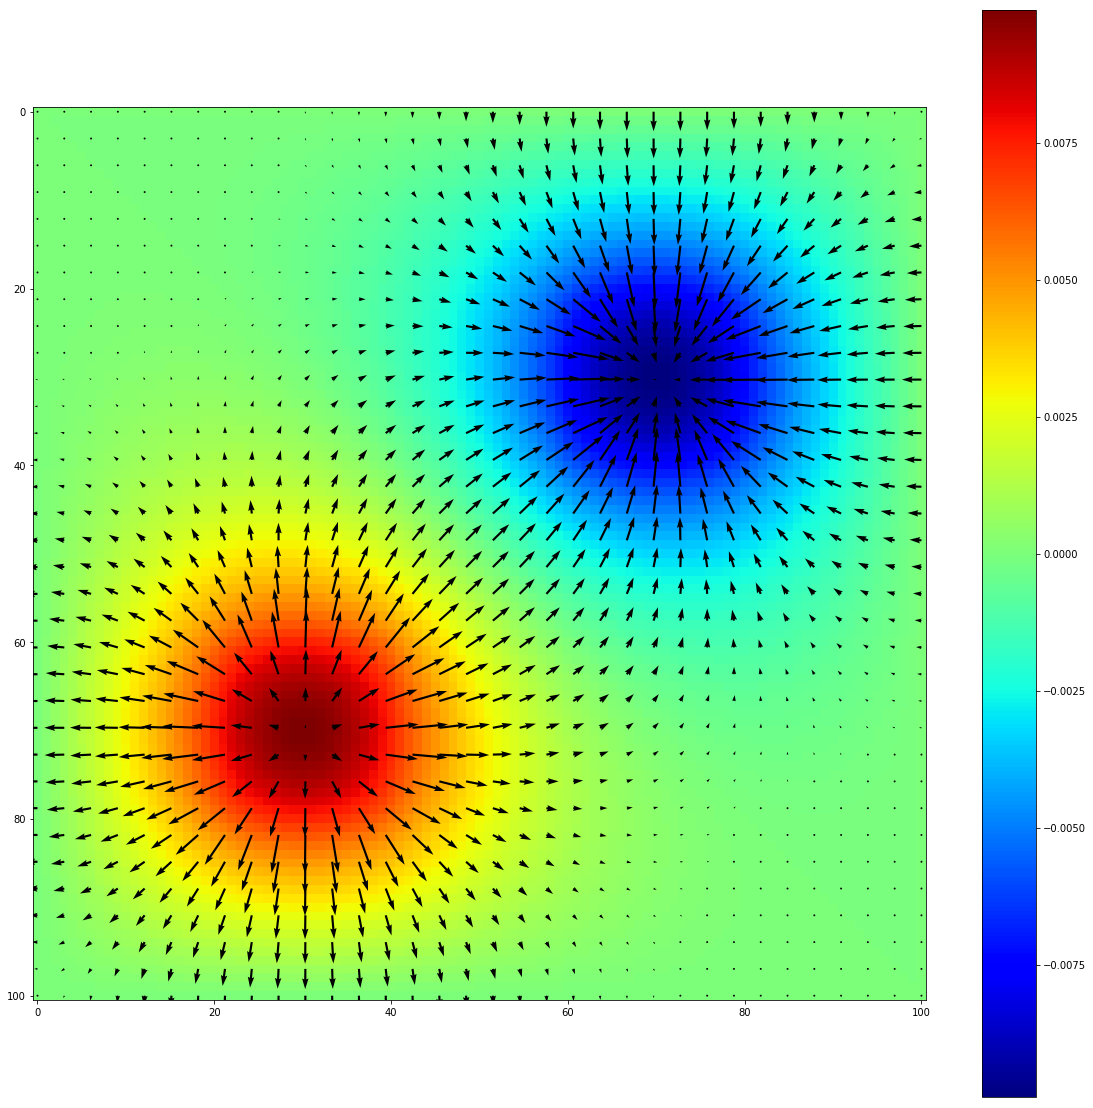

In [3]:
plt.figure(figsize=(20,20))
plt.imshow(phi, cmap='jet')
plt.colorbar()
xx, yy = np.meshgrid(np.linspace(0,100,M), np.linspace(0,100,M))
dy, dx = np.gradient(-1*phi)
skip =  (slice(None, None, 3), slice(None, None, 3))
plt.quiver(xx[skip], yy[skip], dx[skip], -dy[skip])

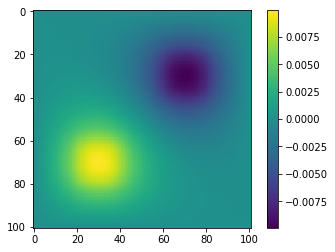

In [4]:
plt.imshow(phi)
plt.colorbar()

### Gauss Seidel method

In [5]:
start = time.time()
M = 100
V = 0

phi = [[0 for i in range(M+1)] for j in range(M+1)]
omega = 0.5
delta = 10
while delta>1e-6:
    old_delta = delta
    delta = 0
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                pass
            elif (j==20 and i>=20 and i<=80):
                phi[i][j] = 1
            elif (j==80 and i>=20 and i<=80):
                phi[i][j] = -1
            else:
                old = phi[i][j] 
                phi[i][j] = ((1+omega)/4)*(phi[i+1][j]+phi[i-1][j]+phi[i][j+1] + phi[i][j-1]) - omega*phi[i][j]
                delta = abs(old-phi[i][j]) if abs(old-phi[i][j])>delta else delta

    if old_delta<delta:
        print("diverging")
end = time.time()
print("Time taken: {}".format(end-start))

Time taken: 16.791368007659912


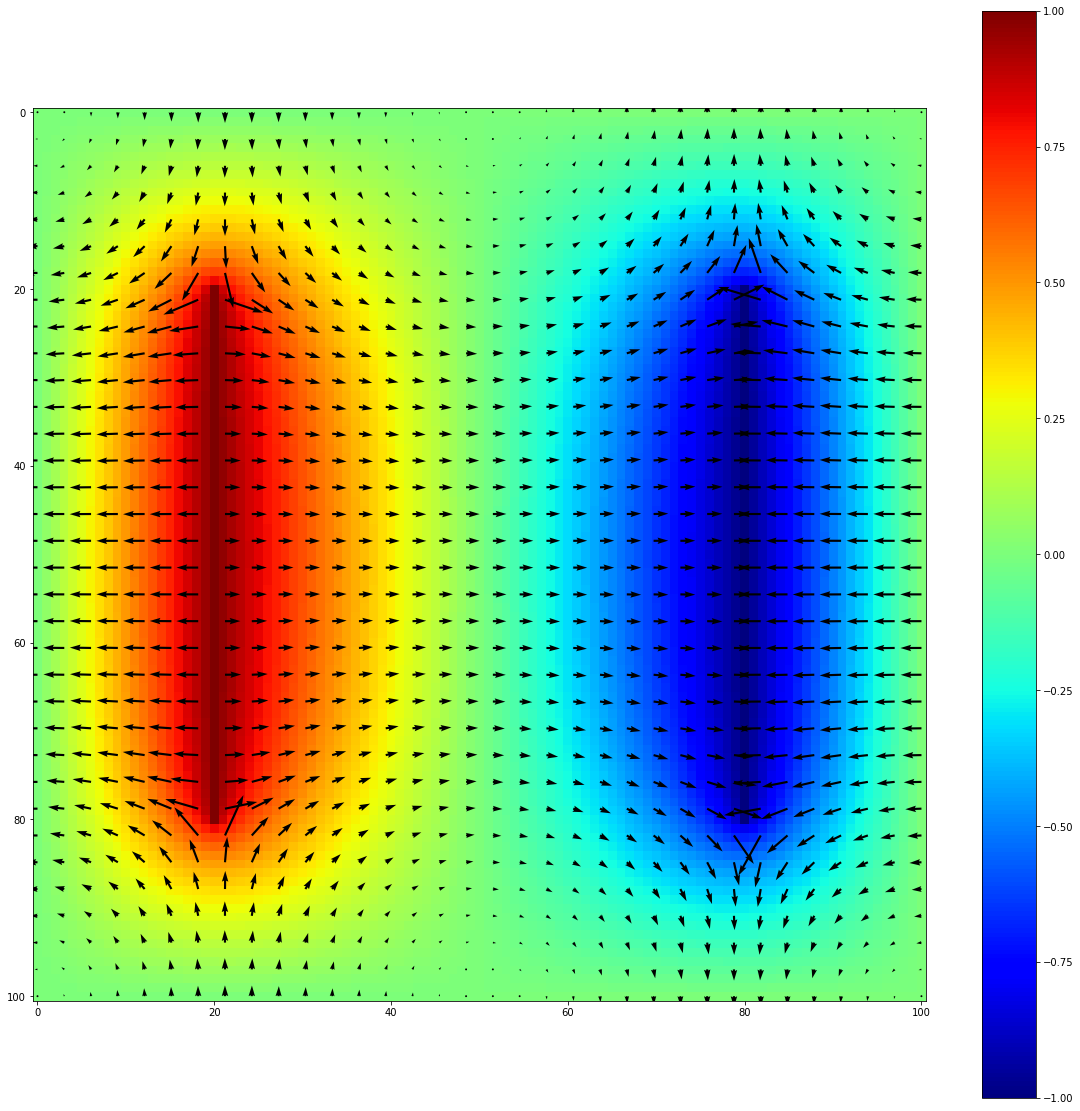

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(phi, cmap='jet')
plt.colorbar()
xx, yy = np.meshgrid(np.linspace(0,100,M), np.linspace(0,100,M))
dy, dx = np.gradient(-1*np.asarray(phi))
skip =  (slice(None, None, 3), slice(None, None, 3))
plt.quiver(xx[skip], yy[skip], dx[skip], dy[skip])